In [16]:
from examples.gpt4v.instruct import system_prompt
from examples.gpt4v.oai import chat
from examples.gpt4v.util import visualize_b64_img
from agentdesk import Desktop

In [17]:
task = "Search for types of Canadian ducks"

In [4]:
# Create a local desktop
desktop = Desktop.local()

using ssh key in ~/.ssh/id_rsa.pub
waiting for desktop to be ready...
calling agentd...
waiting for desktop to be ready...
calling agentd...
waiting for desktop to be ready...
calling agentd...
waiting for desktop to be ready...
calling agentd...
waiting for desktop to be ready...
calling agentd...
waiting for desktop to be ready...
calling agentd...
waiting for desktop to be ready...
calling agentd...
agentd response:  <Response [200]>

successfully created desktop 'wonderful-wilson'
connected to desktop via agentd


In [18]:
# Connect to an existing vm
from agentdesk.vm import DesktopVM

vm_name = "trusting-hoover"
vm = DesktopVM.find(vm_name)
if not vm:
    raise ValueError(f"vm '{vm_name}' not found")
desktop = Desktop(vm=vm)

connected to desktop via agentd


In [61]:
vm.addr

'localhost'

In [7]:
for vm in DesktopVM.list():
    print("vm name: ", vm.name)

vm name:  agitated-bell
vm name:  distracted-yonath


In [19]:
desktop.view(background=True)

found running UI container


In [94]:
desktop.open_url("https://google.com")

In [20]:
# Get the actions a model can take on the desktop as json schema
actions = desktop.json_schema()
actions

[{'name': 'click',
  'parameters': {'type': 'object',
   'properties': {'button': {'type': 'string',
     'description': 'Button to click. Defaults to "left".'},
    'x': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
     'description': 'X coordinate to move to, if not provided it will click on current location. Defaults to None.'},
    'y': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
     'description': 'Y coordinate to move to, if not provided it will click on current location. Defaults to None.'}},
   'required': []},
  'description': 'Click mouse button'},
 {'name': 'double_click',
  'parameters': {'type': 'object', 'properties': {}, 'required': []},
  'description': 'Double click the mouse'},
 {'name': 'drag_mouse',
  'parameters': {'type': 'object',
   'properties': {'x': {'type': 'integer', 'description': 'x coordinate'},
    'y': {'type': 'integer', 'description': 'y coordinate'}},
   'required': ['x', 'y']},
  'description': 'Drag the mouse'},
 {'name': 'move_mouse

In [22]:
msgs = []

In [23]:
# function calling not yet supported in gpt4v
msg =  {
        "role": "system",
        "content": [{"type": "text", "text": system_prompt(actions)}],
}
msgs.append(msg)

In [24]:
response = chat(msgs)
msgs.append(response)
response

{'role': 'assistant',
 'content': "I'm ready. Please send me the current screenshot and the mouse coordinates."}

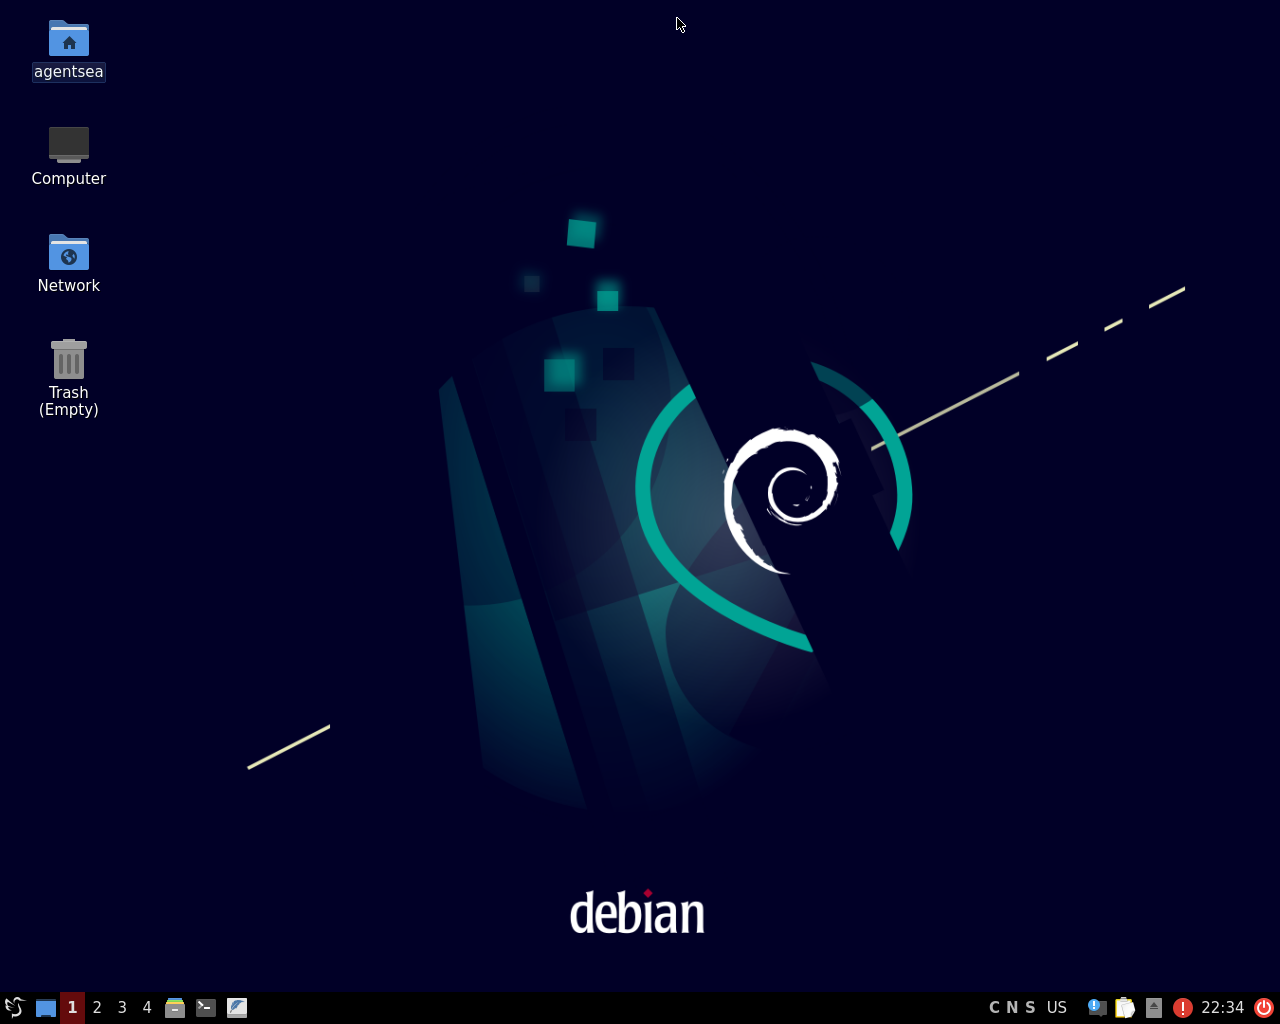

In [25]:
b64_img = desktop.take_screenshot()
visualize_b64_img(b64_img)

In [12]:
x, y = desktop.mouse_coordinates()
(x, y)

(629, 328)

In [13]:
msg = {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"Current mouse coordinates are ({x}, {y}), and the task to solve is '{task}', please return the appropriate next action"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{b64_img}"
          }
        }
      ]
}
msgs.append(msg)

[{'role': 'system',
  'content': [{'type': 'text',
    'text': 'You are using a computer, you have access to a mouse and keyboard. \nI\'m going to show you the picture of the screen along with the current mouse coordinates. \n\nWe will then select from a set of actions:\n\n[\n    {\n        "name": "click",\n        "parameters": {\n            "type": "object",\n            "properties": {\n                "button": {\n                    "type": "string",\n                    "description": "Button to click. Defaults to \\"left\\"."\n                },\n                "x": {\n                    "anyOf": [\n                        {\n                            "type": "integer"\n                        },\n                        {\n                            "type": "null"\n                        }\n                    ],\n                    "description": "X coordinate to move to, if not provided it will click on current location. Defaults to None."\n                },\n      
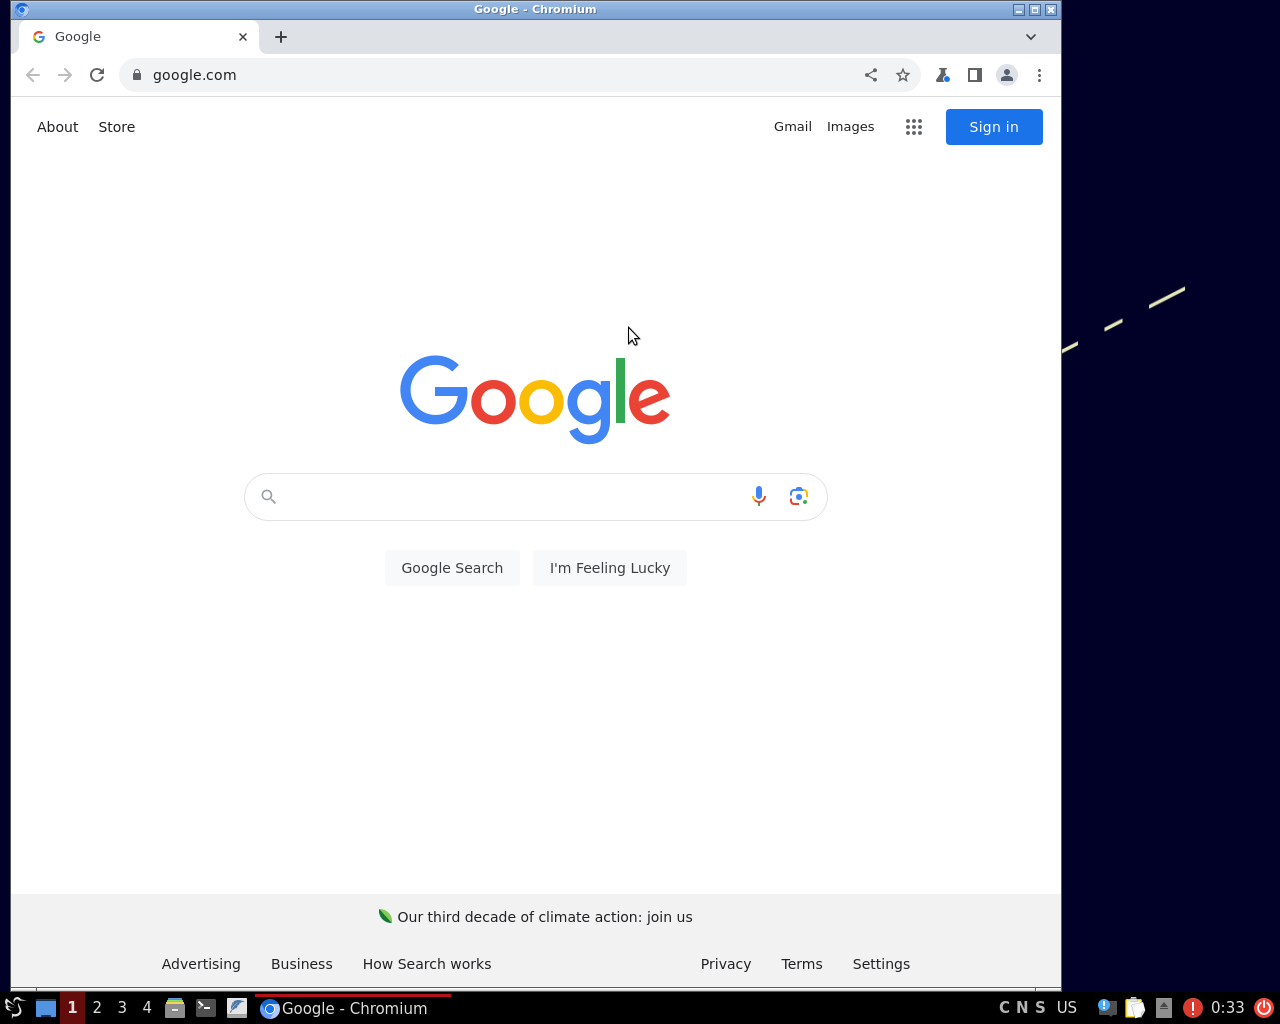

In [19]:
msgs

In [20]:
response = chat(msgs)
response

{'role': 'assistant',
 'content': 'To begin the search for types of Canadian ducks, the next step is to move'}

In [ ]:
msgs.append(response)

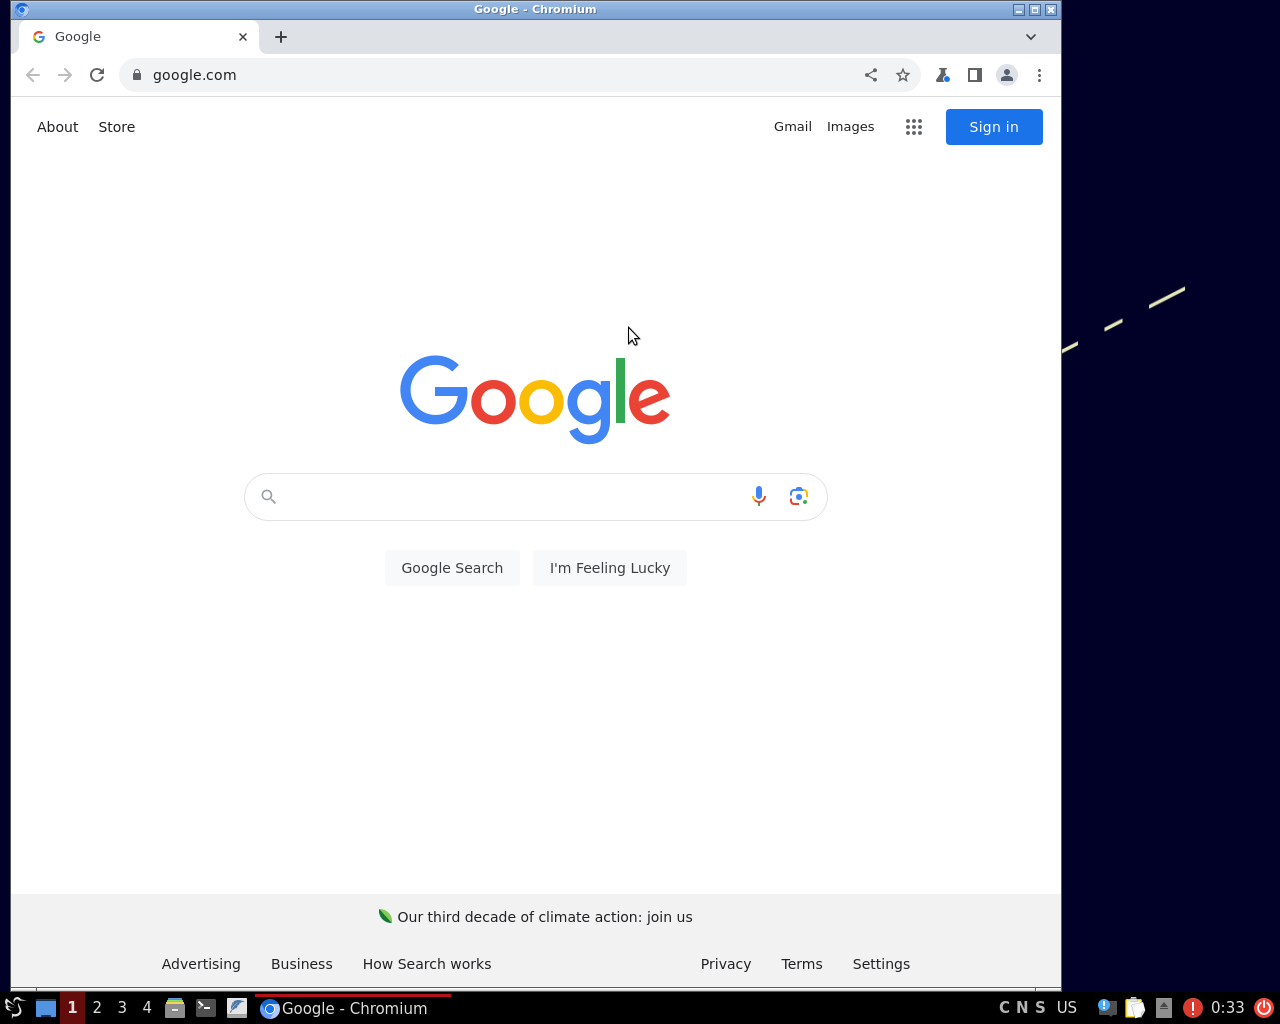

In [22]:
visualize_b64_img(b64_img)

agentsea@trusting-hoover:~$ env
SHELL=/bin/bash
PWD=/home/agentsea
LOGNAME=agentsea
XDG_SESSION_TYPE=tty
MOTD_SHOWN=pam
HOME=/home/agentsea
LANG=C.UTF-8
LC_TERMINAL=iTerm2
SSH_CONNECTION=10.0.2.2 49503 10.0.2.15 22
XDG_SESSION_CLASS=user
TERM=xterm-256color
USER=agentsea
LC_TERMINAL_VERSION=3.4.19
SHLVL=1
XDG_SESSION_ID=20
XDG_RUNTIME_DIR=/run/user/1001
SSH_CLIENT=10.0.2.2 49503 22
XDG_DATA_DIRS=/usr/local/share:/usr/share:/var/lib/snapd/desktop
PATH=/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
DBUS_SESSION_BUS_ADDRESS=unix:path=/run/user/1001/bus
SSH_TTY=/dev/pts/0
_=/usr/bin/env